In [77]:
import pandas as pd

# importing the csv files which contains stories with lda_scores based on topics
first_file = pd.read_csv("1-2-3_test.csv")
second_file = pd.read_csv("2-3-4_test.csv")



In [85]:
def retrieveStory(file, row, column):
    # This function takes a csv file's path, row numer and column number as input and then 
    # retrieves that story's lda_score, lemmas and number of lemmas as output 
    file = pd.read_csv(file)
    score = file.iloc[row, column]
    topic = file.iloc[0, column]
    lemmas_in_story = file.iloc[row, -2]
    number_of_lemmas = file.iloc[row, -1]
    actual_words_in_story = file.iloc[row, -4]
    number_of_actual_words = file.iloc[row, -3]
#     print("Score: {}, Topic: {}, Number of Actual Words: {}, Actual Words in Story: {},Lemmas in Story: {}, Number of Lemmas: {}"
#           .format(score, topic, number_of_actual_words, actual_words_in_story, lemmas_in_story, number_of_lemmas))
    return score, lemmas_in_story, number_of_lemmas, actual_words_in_story, number_of_actual_words, topic

In [86]:
# For example
retrieveStory("1-2-3_test.csv", 799, 48)

('0.81838598709',
 "['American', 'girl', 'new', 'doll', 'store', 'today', 'name', 'Leah', 'Clark', 'describe', '10-year-old', 'girl', 'visit', 'Brazil', 'photograph', 'animal', 'movie', 'three', 'book', 'ready', 'kid', 'knock', 'door', 'order']",
 '24',
 "['American', 'girl', 'has', 'a', 'new', 'doll', 'out', 'in', 'stores', 'today', '.', 'Her', 'name', 'is', 'Leah', 'Clark', '.', 'She', '&apos;s', 'described', 'as', 'a', '10-year-old', 'girl', 'who', 'visits', 'Brazil', 'and', 'photographs', 'animals', '.', 'There', '&apos;s', 'going', 'to', 'be', 'movie', 'and', 'three', 'books', 'about', 'her', '.', 'Get', 'ready', 'to', 'have', 'your', 'kids', 'knocking', 'down', 'your', 'door', 'to', 'order', 'that', '.']",
 '57',
 '54-year-old conquer sheriff bloodworth pursuit Heights Lexus doll investigator girl')

In [83]:
#retrieveStory("2-3-4_test.csv", 2583, 11)

In [98]:
retrieveStory("1-2-3_test.csv", 1442, 50)

('0.753327028209',
 "['clean', 'biggest', 'party', 'year', 'easy', 'feat', 'science', '170', 'worker', 'clean', '48', 'ton', 'debris']",
 '13',
 "['Cleaning', 'up', 'after', 'the', 'biggest', 'party', 'of', 'the', 'year', 'is', 'no', 'easy', 'feat', '.', 'But', 'they', 'have', 'it', 'down', 'so', 'a', 'science', '.', '170', 'workers', 'got', 'it', 'done', '.', 'They', 'cleaned', 'up', '48', 'tons', 'of', 'debris', '.']",
 '37',
 'blooded Kennel JEB coaster pickup cam candidacy prosthetic brilliance fodder')

In [149]:
#retrieveStory("2-3-4_test.csv", 1081, 63)

In [150]:
#retrieveStory("2-3-4_test.csv", 1159, 63)

In [153]:
#retrieveStory("2-3-4_test.csv", 2150, 96)

In [151]:
#retrieveStory("2-3-4_test.csv", 2318, 10)


In [99]:
# Retrieving the lemmas from the notable stories
first_story = retrieveStory("1-2-3_test.csv", 799, 48)[1]
second_story = retrieveStory("1-2-3_test.csv", 953, 58)[1]
third_story = retrieveStory("1-2-3_test.csv", 955, 61)[1]
fourth_story = retrieveStory("1-2-3_test.csv", 960, 24)[1]
fifth_story = retrieveStory("1-2-3_test.csv", 976, 48)[1]
sixth_story = retrieveStory("1-2-3_test.csv", 1110, 58)[1]
seventh_story = retrieveStory("1-2-3_test.csv", 1117, 24)[1]
#eighth_story = retrieveStory("2-3-4_test.csv", 2583, 11)[1]

In [100]:
from textblob import TextBlob
def sentimentAnalysis(story):
    # This function takes the words of a story as input and gives a polarity and a subjectivity score as output
    blob = TextBlob(story)
    for sentence in blob.sentences:
        return sentence.sentiment

In [102]:
stories = [first_story, second_story, third_story, fourth_story, fifth_story, sixth_story, seventh_story, eighth_story]
# Using the texblob package to get a polarity score and a subjectivity score
story_sentiments = [sentimentAnalysis(story) for story in stories]
story_sentiments

[Sentiment(polarity=0.11212121212121212, subjectivity=0.3181818181818182),
 Sentiment(polarity=-0.25, subjectivity=0.45),
 Sentiment(polarity=0.4, subjectivity=0.45),
 Sentiment(polarity=0.2, subjectivity=0.2),
 Sentiment(polarity=0.11212121212121212, subjectivity=0.3181818181818182),
 Sentiment(polarity=-0.25, subjectivity=0.45),
 Sentiment(polarity=0.2, subjectivity=0.2),
 Sentiment(polarity=0.10913872948756671, subjectivity=0.507068190207725)]

In [106]:
# Building a small test sql database which contains the story id, insex, lda score, lemmas and number of lemmas
import sqlite3
conn = sqlite3.connect('test.db')
c = conn.cursor()
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS myTable(id INTEGER, score_index TEXT, lda_score REAL, lemmas TEXT, number_of_lemmas INTEGER, polarity_score REAL, subjectivity_score REAL)')

create_table()


In [107]:
# Adding data to the database

c.execute("INSERT INTO myTable(id, score_index, lda_score, lemmas, number_of_lemmas, polarity_score, subjectivity_score) VALUES(?, ?, ?, ?, ?, ?, ?)", 
          (1, '799, 48', retrieveStory("1-2-3_test.csv", 799, 48)[0], retrieveStory("1-2-3_test.csv", 799, 48)[1],
           retrieveStory("1-2-3_test.csv", 799, 48)[2], story_sentiments[0][0], story_sentiments[0][1]))

c.execute("INSERT INTO myTable(id, score_index, lda_score, lemmas, number_of_lemmas, polarity_score, subjectivity_score) VALUES(?, ?, ?, ?, ?, ?, ?)", 
          (2, '953, 58', retrieveStory("1-2-3_test.csv", 953, 58)[0], retrieveStory("1-2-3_test.csv", 953, 58)[1],
           retrieveStory("1-2-3_test.csv", 953, 58)[2], story_sentiments[1][0], story_sentiments[1][1]))

c.execute("INSERT INTO myTable(id, score_index, lda_score, lemmas, number_of_lemmas, polarity_score, subjectivity_score) VALUES(?, ?, ?, ?, ?, ?, ?)", 
          (3, '960, 24', retrieveStory("1-2-3_test.csv", 960, 24)[0], retrieveStory("1-2-3_test.csv", 960, 24)[1],
           retrieveStory("1-2-3_test.csv", 960, 24)[2], story_sentiments[2][0], story_sentiments[2][1]))
conn.commit()

<Container object of 3097 artists>

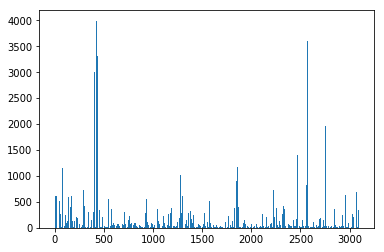

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
new_file = first_file.drop(first_file.index[0])
new_file.shape
row = new_file.iloc[0]
plt.bar(range(0,3097), new_file['-4'])


In [109]:
from wnaffect import WNAffect
from emotion import Emotion
import nltk
wna = WNAffect('wordnet-1.6/', 'wn-domains-3.2/')


In [110]:
from ast import literal_eval as le

def posTag(story):
    # This funtion takes a list of words as an input and returns the pos tags of those words as output
    make_list = le(story)
    return nltk.pos_tag(make_list)

In [111]:
pos_first_story = posTag(first_story)
pos_second_story = posTag(second_story)
pos_third_story = posTag(third_story)
pos_fourth_story = posTag(fourth_story)
pos_stories = [pos_first_story, pos_second_story, pos_third_story, pos_fourth_story]

In [113]:
for story in pos_stories:
    for word, pos in story:
        print(word, pos)
        emo = wna.get_emotion(word, pos)
        print(emo)

    #print(' -> '.join([emo.get_level(i).name for i in range(emo.level + 1)]))


American NNP
None
girl VBD
None
new JJ
None
doll NN
None
store NN
None
today NN
None
name NN
None
Leah NNP
None
Clark NNP
None
describe VBZ
None
10-year-old JJ
None
girl JJ
None
visit NN
None
Brazil NNP
None
photograph NN
None
animal NN
None
movie NN
None
three CD
None
book NN
None
ready JJ
None
kid NN
None
knock VB
None
door NN
None
order NN
None
mom NN
None
so-called JJ
None
Affluenza NNP
None
teen NN
None
hold VBD
None
$ $
None
1 CD
None
million CD
None
bond NN
None
attorney NN
None
say VBP
None
anything NN
None
wrong JJ
None
explain NN
None
welcome VB
None
back RB
None
everyone NN
None
t NN
None
prosecutor NN
None
Texas NNP
None
charge NN
bang
Tonya NNP
None
couch JJ
None
hinder NN
None
apprehension NN
apprehension
felon NN
None
hold VBP
None
L.A. NNP
None
$ $
None
1 CD
None
million CD
None
bond NN
None
now RB
None
couch JJ
None
accuse NN
None
help NN
None
son NN
None
Ethan NNP
None
flee NN
None
Mexico NNP
None
still RB
None
fight VBD
None
deportation NN
None
back RB
None
U.S. NNP


In [ ]:
text = ("")